**Social media time waste**

Analysis of time waste by social media users.

Clustering of social media  users.

original data : https://www.kaggle.com/datasets/muhammadroshaanriaz/time-wasters-on-social-media

In [1]:
#varie librerie
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading data from my personal  google drive path
data = pd.read_csv('/content/drive/MyDrive/DatasetProjects/TimeWastersonSocialMedia.csv')
print("Number of datapoints:", len(data))

Number of datapoints: 1000


EDA & PRE-PROCESSING

Further data visualization analytics with Tableau

Preparing data for clustering : check type,rilevance,missing values,scaling and encoding

In [4]:
data.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [5]:
data.isnull().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [7]:
data.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


Deleting not interesting feature for clustering and further analysis

In [8]:
data=data.drop(['UserID','Video ID','Watch Time'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Location                  1000 non-null   object
 3   Income                    1000 non-null   int64 
 4   Debt                      1000 non-null   bool  
 5   Owns Property             1000 non-null   bool  
 6   Profession                1000 non-null   object
 7   Demographics              1000 non-null   object
 8   Platform                  1000 non-null   object
 9   Total Time Spent          1000 non-null   int64 
 10  Number of Sessions        1000 non-null   int64 
 11  Video Category            1000 non-null   object
 12  Video Length              1000 non-null   int64 
 13  Engagement                1000 non-null   int64 
 14  Importance Score         

dwc is a variable for saving cluster label after clustering

In [9]:
dwc=data.copy()

check categorical features in data

In [10]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Gender', 'Location', 'Profession', 'Demographics', 'Platform', 'Video Category', 'Frequency', 'Watch Reason', 'DeviceType', 'OS', 'CurrentActivity', 'ConnectionType']


label encoding : necessary for cluster algoritm

In [11]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


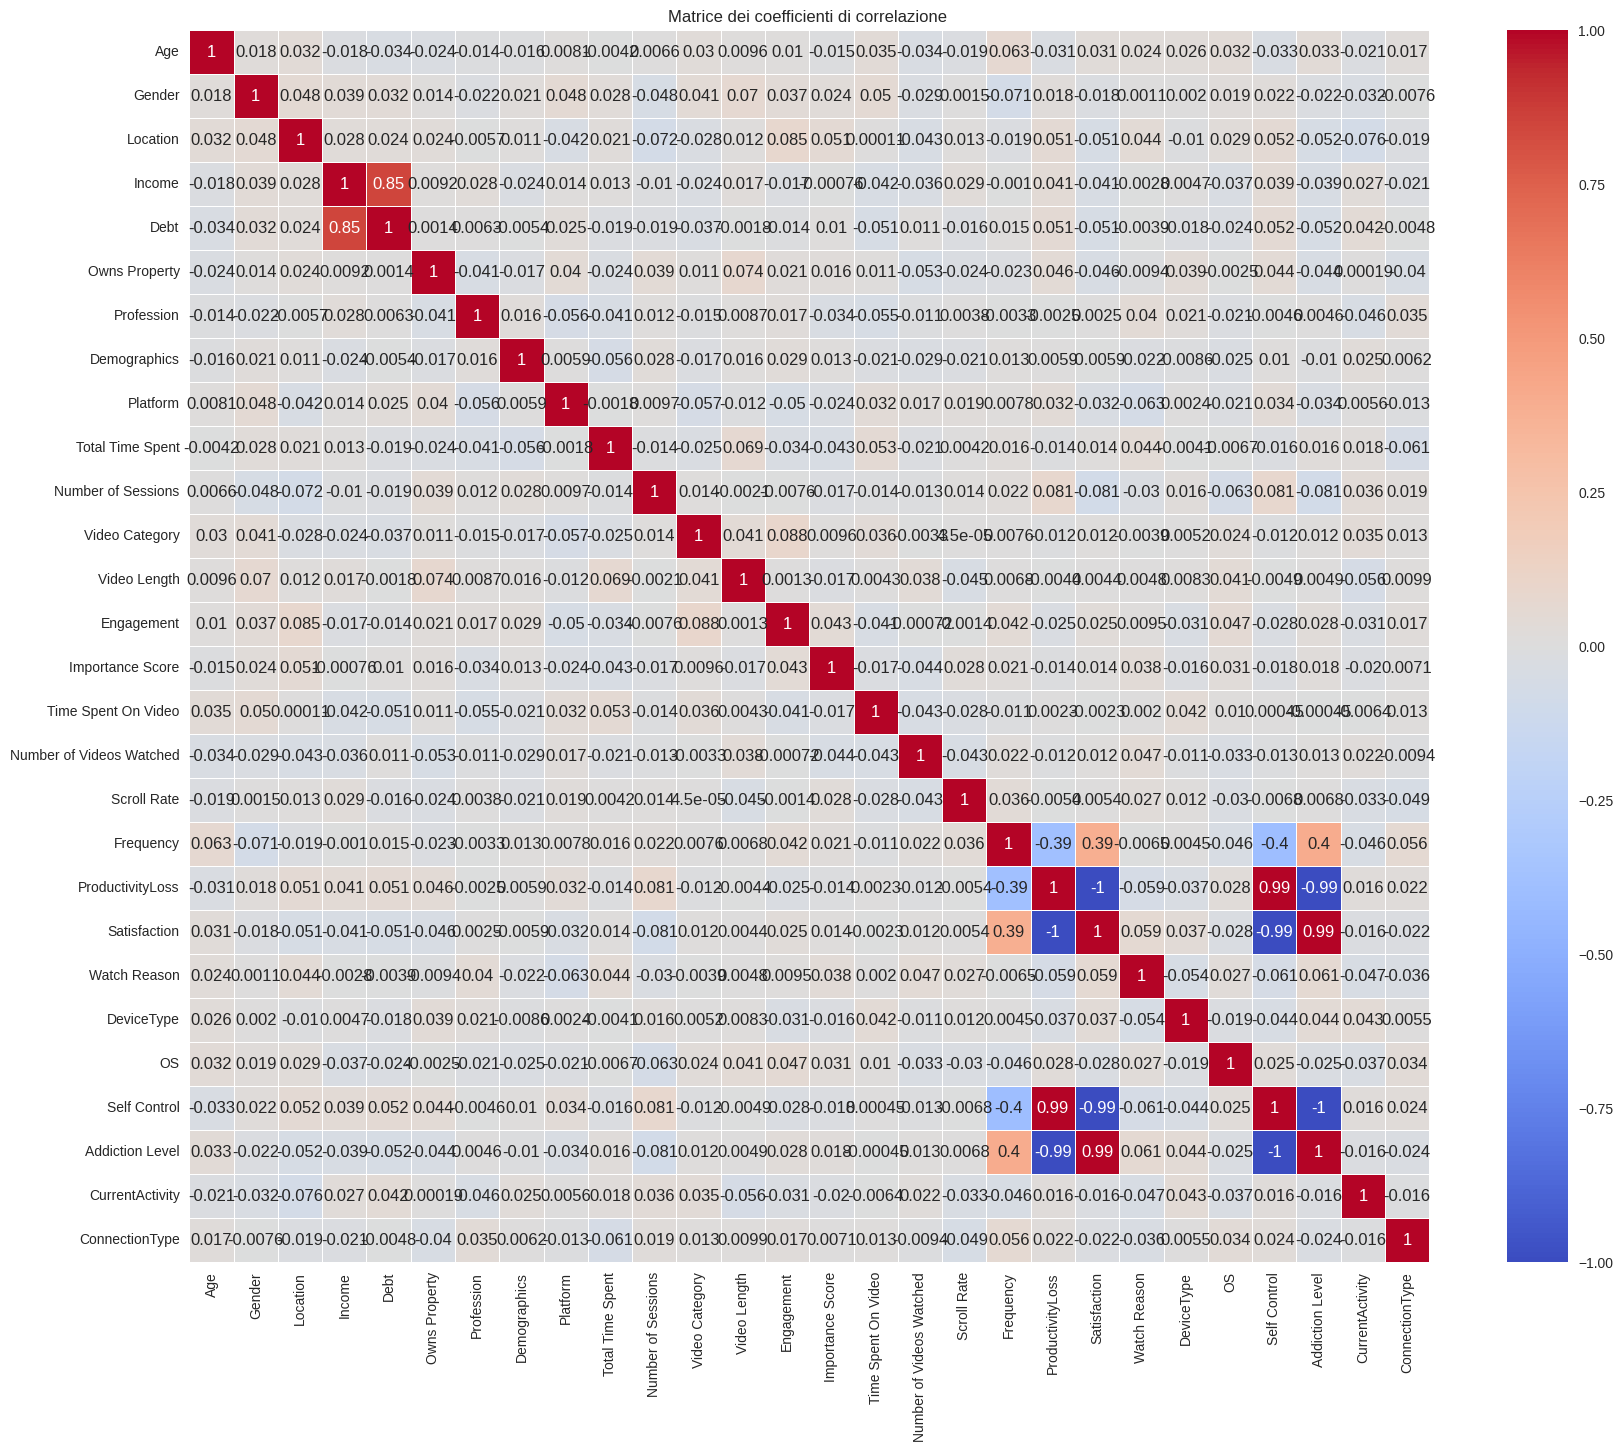

In [12]:
correlation_matrix = data.corr() #calcola i coefficienti di correlazione
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice dei coefficienti di correlazione ')
plt.show()

scaling data

In [13]:
#scaling dei dati con variabile ds
ds=data.copy()
ds.head()

,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,...,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,56,1,6,82812,True,True,2,0,1,80,...,3,3,7,3,1,0,5,5,3,0
1,46,0,5,27999,False,True,0,1,1,228,...,0,5,5,2,0,0,7,3,1,1
2,32,0,8,42436,False,True,2,0,0,30,...,1,6,4,1,2,0,8,2,0,0
3,60,1,0,62963,True,False,7,0,3,101,...,3,3,7,2,1,0,5,5,3,0
4,25,1,6,22096,False,True,4,1,2,136,...,2,8,2,0,1,3,10,0,0,0


In [14]:
#Scaling dei dati per avere migliori performance
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [15]:
scaled_ds.head()

,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,...,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1.112882,0.232696,0.503128,0.981599,0.818199,0.919249,-1.179318,-0.583509,-0.506167,-0.850977,...,1.315942,-1.006976,1.006976,1.693943,-0.241115,-0.89247,-1.017757,1.017757,1.860007,-0.676554
1,0.371652,-1.240066,0.157810,-1.328813,-1.222197,0.919249,-2.057440,1.713770,-0.506167,0.912804,...,-1.307198,-0.064115,0.064115,0.696332,-1.837901,-0.89247,-0.045687,0.045687,-0.078510,1.478078
2,-0.666069,-1.240066,1.193763,-0.720282,-1.222197,0.919249,-1.179318,-0.583509,-1.423137,-1.446849,...,-0.432818,0.407316,-0.407316,-0.301278,1.355671,-0.89247,0.440348,-0.440348,-1.047768,-0.676554
3,1.409373,0.232696,-1.568778,0.144948,0.818199,-1.087845,1.015987,-0.583509,1.327772,-0.600710,...,1.315942,-1.006976,1.006976,0.696332,-0.241115,-0.89247,-1.017757,1.017757,1.860007,-0.676554
4,-1.184929,0.232696,0.503128,-1.577629,-1.222197,0.919249,-0.301196,1.713770,0.410802,-0.183600,...,0.441562,1.350177,-1.350177,-1.298889,-0.241115,1.44588,1.412417,-1.412417,-1.047768,-0.676554


DIMENSIONALITY REDUCTION

Pca method and choice of param n_components for clustering

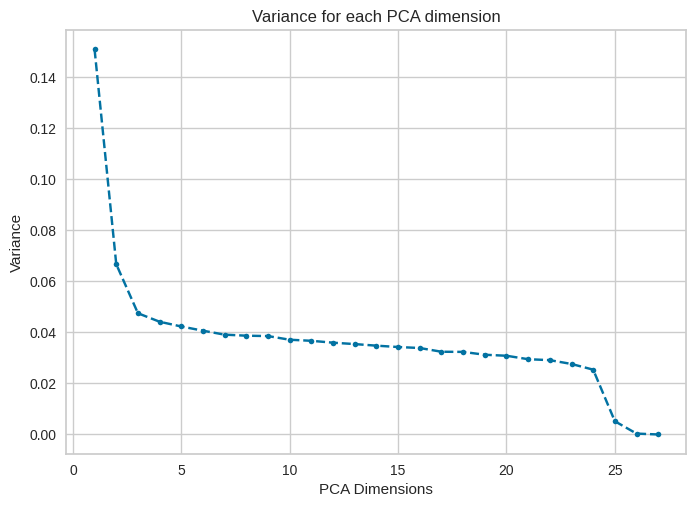

In [16]:
pca = PCA(27) #param is the number of features in the dataset
pca.fit(scaled_ds)
plt.plot(range(1,28),pca.explained_variance_ratio_,'o--', markersize=4)
plt.title ('Variance for each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

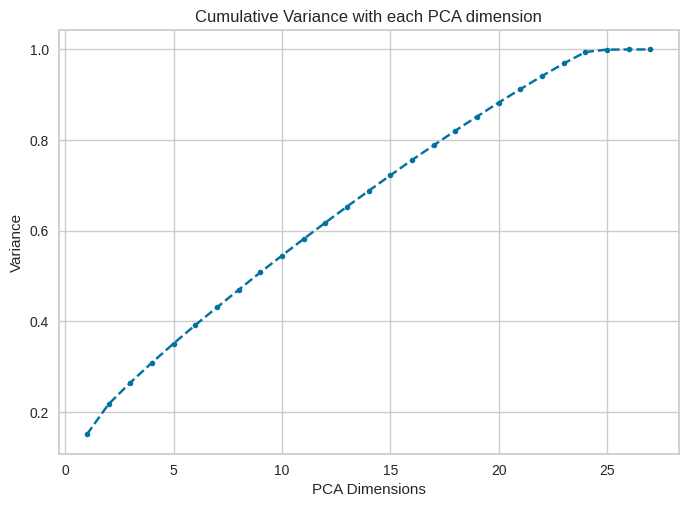

In [17]:
#same information but cumulative
plt.plot(range(1,28),pca.explained_variance_ratio_.cumsum(),'o--', markersize=4)
plt.title ('Cumulative Variance with each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

values between 3 and 23 are good for n_components param : the variance difference is very small. So let's go with 3

In [18]:
pca = PCA(n_components=3) #defing pca with new param
pca.fit(scaled_ds) #fit
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"])) # creating a pca(3) dataframe for clustering
PCA_ds.describe().T #some statistics

,count,mean,std,min,25%,50%,75%,max
col1,1000.0,3.552714e-17,2.055504,-3.519842,-1.236487,-0.340723,2.099693,4.427204
col2,1000.0,-8.881784e-17,1.366294,-2.204958,-1.172049,-0.545617,1.473937,2.388380
col3,1000.0,-4.796163e-17,1.149588,-3.108707,-0.814503,-0.027459,0.760583,4.202980


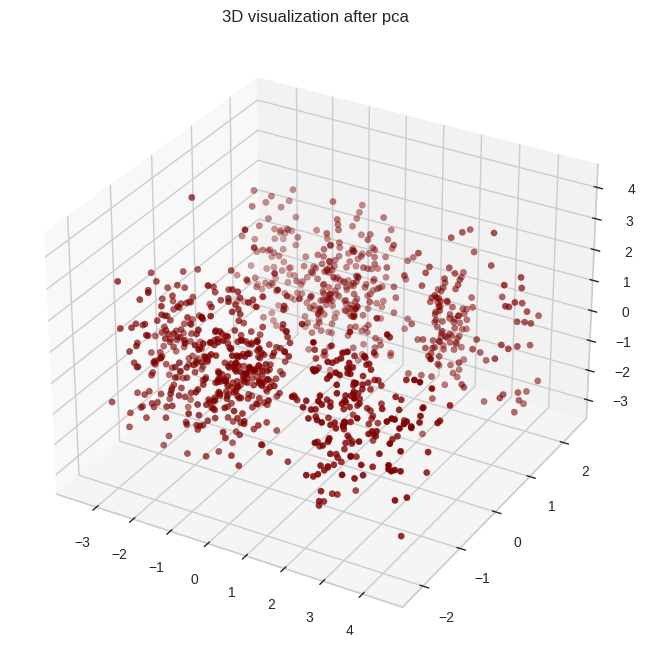

In [19]:
#3D visualization of data
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("3D visualization after pca ")
plt.show()

CLUSTERING

Using elbow method for choosing the number of cluster

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

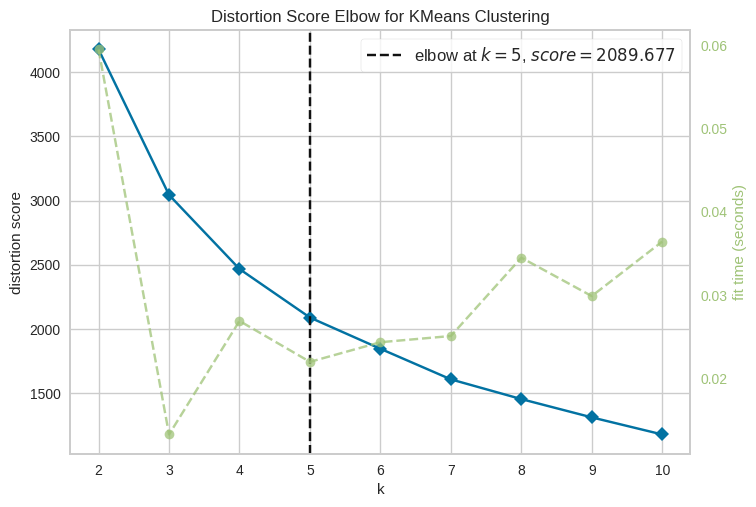

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
#with k means
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10) #evaluating  10 cluster
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


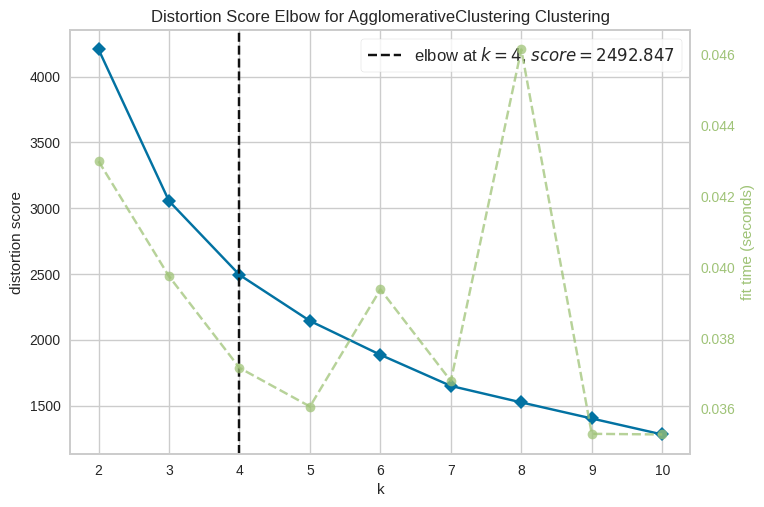

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
#with agglomerative clustering
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

clustering using Kmeans

In [22]:
KM=KMeans(n_clusters=5, random_state=0, n_init="auto")

label_KM = KM.fit_predict(PCA_ds) #saving cluster labels for appending them in pca and dwc datasets for visualization
PCA_ds["Clusters"] = label_KM

#aggiungo la colonna del cluster anche al dataframe di partenza che avevo ripulito dai dati mancanti
dwc["Clusters"]= label_KM

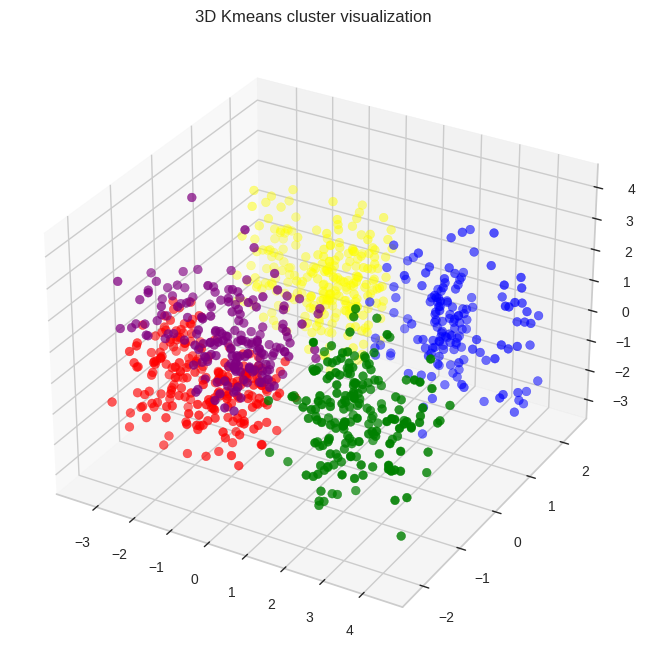

In [23]:
#3D plot of clusters
from matplotlib import colors
cmap = colors.ListedColormap([ "red", "green", "yellow",  "blue","purple"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap) # x y z variables defined before
ax.set_title("3D Kmeans cluster visualization  ")
plt.show()

clustering using DBScan

In [24]:
from sklearn.cluster import DBSCAN

DBscan = DBSCAN(eps=1, min_samples=10).fit_predict(PCA_ds)
PCA_ds["DB_Clusters"] = DBscan

In [25]:
PCA_ds.head()

,col1,col2,col3,Clusters,DB_Clusters
0,2.206500,-1.391359,0.747452,1,0
1,-0.134790,2.100428,0.273173,2,1
2,-0.774681,1.413527,0.992021,2,1
3,2.253622,-0.935162,-2.913769,1,0
4,-2.596530,2.080755,0.760660,2,1


In [26]:
print(DBscan) #-1 value means a noise point

[ 0  1  1  0  1  2  1  2  2  1  3  1  1  4  4  3  1  1  1  4  1  1  0  1
  3  3  1  2  3  3  1  4  2  4  1  0  2  4  0  1  1  3  4  0  1  4  1  0
  1  4  1  4  1  4  1  2  4  4  0  0  4  4  1  1  4  1  1  1  0  1  1  0
  4  2  0  2  2  1  1  2  1  3  1  1  0  0  2 -1  2  2  3  0  0  0  4  3
  4  3  0  1  1  0  0  0  0  1  0  0  3  0  0  3  1  4  0  2  4  4  1  2
  0  0  1  3  0  3  2  0  1  1  1  2  0  1  1  1  0  2  1  1  1  3  1  0
  3  1  2  3  4  1  4  0  3  1  2  4  0  0  4  3  1  3  0  1  1  1  1  4
  3  4  4  2  2  3  0  1  1  3  1  4  1  1  1  3  0  1  1  3  3  1  3  1
  1  4  4  4  1  0  3  3  4  1  4  2  0  1  2  1  2  1  1  3  1  1  3  2
  4  3  2  2  0  3  4  1  1  3  0  0  1  2  2  0  0  3  1  4  1  0  4  1
  1  4  0  0  3  2  4  4  1  4  4  0  3  4  4  1  2  3  4  1  1  3  4  3
  2  3  1  0  0  3  3  4  4  1  3  2  0  4  2  3  3  1  4  1  4  3  1  0
  0  1  4  2  3  1  3  1  0  3  1  1  1  1  1  4  4  0  3  1  4  3  2  2
  2  3  2  0  4  2  3  4  1  1  3  4  3  0  2  4  0

In [27]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(DBscan)) - (1 if -1 in DBscan else 0)
n_noise_ = list(DBscan).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 15


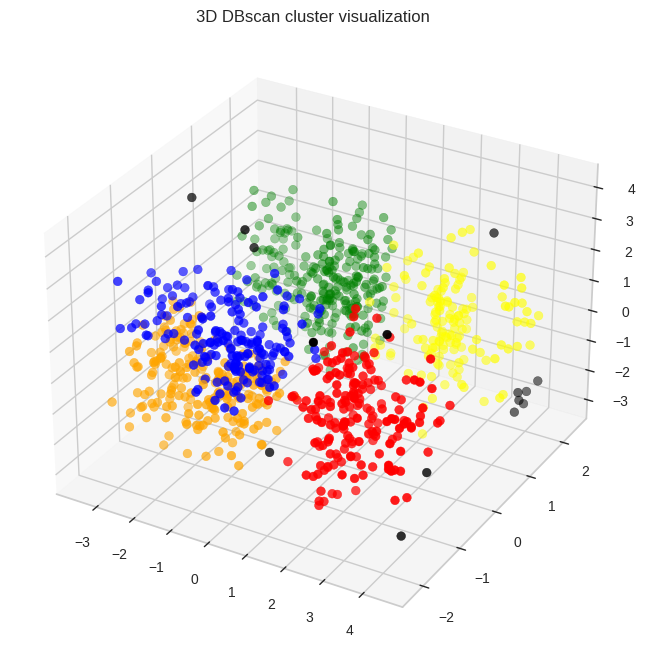

In [28]:
#3D visualization of dbscan
from matplotlib import colors
cmap = colors.ListedColormap(["black", "red", "green", "yellow", "orange", "blue"]) #black for noise point

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["DB_Clusters"], marker='o', cmap=cmap ) # x y z variables defined before
ax.set_title("3D DBscan cluster visualization  ")
plt.show()

In [29]:
dwc["DB_Clusters"]= DBscan
dwc.head()

,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,...,Satisfaction,Watch Reason,DeviceType,OS,Self Control,Addiction Level,CurrentActivity,ConnectionType,Clusters,DB_Clusters
0,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,80,...,7,Procrastination,Smartphone,Android,5,5,Commuting,Mobile Data,1,0
1,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,228,...,5,Habit,Computer,Android,7,3,At school,Wi-Fi,2,1
2,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,30,...,4,Entertainment,Tablet,Android,8,2,At home,Mobile Data,2,1
3,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,101,...,7,Habit,Smartphone,Android,5,5,Commuting,Mobile Data,1,0
4,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,136,...,2,Boredom,Smartphone,iOS,10,0,At home,Mobile Data,2,1


different algorithm can produce different clusters

In [30]:
km=dwc['Clusters']
db=dwc['DB_Clusters']

cont=0

for i in km:
  if km[i]!=db[i]:
    cont=cont+1

cont=str(cont)
print('records with different cluster between dbcan and km are : ' +cont)

records with different cluster between dbcan and km are : 1000


Other data analysis with the following dataset with Tableau

In [31]:
#download on local machine
dwc.to_csv('SocialMediaData_clean&cluster.csv') # set file format and name
from google.colab import files
files.download("SocialMediaData_clean&cluster.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

** GIORGIO OLIVIERI**